# PROJECT DESCRIPTION

### Objective: 
Prediction Turbine Energy Yield (TEY) 

### Description: 
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant as the dataset used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Data is sorted in chronological order. Using the first three years' data for training/ cross-validation and the last two for testing for reproducibility and comparability of works. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.

### Data Source: 
https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#

### Data Description:
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions.

###Variable (Abbr.)  &  Unit:
- Ambient temperature (AT) C 
- Ambient pressure (AP) mbar 
- Ambient humidity (AH) (%) 
- Air filter difference pressure (AFDP) mbar
- Gas turbine exhaust pressure (GTEP) mbar 
- Turbine inlet temperature (TIT) C 
- Turbine after temperature (TAT) C
- Compressor discharge pressure (CDP) mbar 
- Turbine energy yield (TEY) MWH 
- Carbon monoxide (CO) mg/m^3
- Nitrogen oxides (NOx) mg/m^3

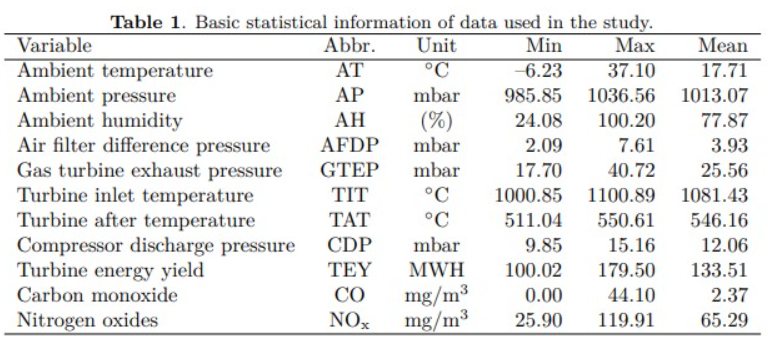

In [41]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#### Creating dataframe for all collected data

In [3]:
df = pd.concat(map(pd.read_csv,["/content/gt_2011.csv",
                                  "/content/gt_2012.csv",
                                  "/content/gt_2013.csv",
                                  "/content/gt_2014.csv",
                                  "/content/gt_2015.csv"]),ignore_index=True)
df.shape

(36733, 11)

In [4]:
df.head(2)

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   

        CO     NOX  
0  0.32663  81.952  
1  0.44784  82.377

#### Checking datatype of all features and count of null values along with count of non-null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


#### Checking statictical summary of all numerical colunms

In [6]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

#### Checking total count of null values

In [7]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

- No missing values so all entries are valid

#### Checking total count of unique values

In [8]:
df.nunique()

AT      22523
AP        791
AH      25708
AFDP    20495
GTEP    12967
TIT       799
TAT      2769
TEY      6236
CDP      4447
CO      26185
NOX     23637
dtype: int64

#### Checking total count of duplicated values in dataframe

In [9]:
df.duplicated().sum()

7

#### Droping all duplicate values from dataframe

In [10]:
display(df.drop_duplicates(keep=False, inplace=True))

None

In [11]:
df.duplicated().sum()

0

#### Checking correlation of every feature with other feature 
- Values lies between 0 to 1
- '-' sign indicates inverse correlation
- '+' indictaes features are directly correlated

In [12]:
df.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.406481 -0.476607  0.251833  0.045751  0.183641  0.281839   
AP   -0.406481  1.000000 -0.014902 -0.040225  0.057591 -0.005362 -0.225532   
AH   -0.476607 -0.014902  1.000000 -0.148011 -0.235238 -0.221876  0.022869   
AFDP  0.251833 -0.040225 -0.148011  1.000000  0.678446  0.691261 -0.466975   
GTEP  0.045751  0.057591 -0.235238  0.678446  1.000000  0.874219 -0.699757   
TIT   0.183641 -0.005362 -0.221876  0.691261  0.874219  1.000000 -0.380883   
TAT   0.281839 -0.225532  0.022869 -0.466975 -0.699757 -0.380883  1.000000   
TEY  -0.091223  0.118236 -0.137371  0.665474  0.964129  0.910291 -0.682420   
CDP   0.015200  0.102691 -0.196338  0.702546  0.978469  0.908461 -0.706479   
CO   -0.174261  0.066969  0.106685 -0.448405 -0.518907 -0.706290  0.058382   
NOX  -0.558072  0.191636  0.165015 -0.188102 -0.201608 -0.213865 -0.092690   

           TEY       CDP        CO       NOX  
AT   -0.091223  0.015200 -0.174261 -0.558072  
AP    0.118236  0.102691  0.066969  0.191636  
AH   -0.137371 -0.196338  0.106685  0.165015  
AFDP  0.665474  0.702546 -0.448405 -0.188102  
GTEP  0.964129  0.978469 -0.518907 -0.201608  
TIT   0.910291  0.908461 -0.706290 -0.213865  
TAT  -0.682420 -0.706479  0.058382 -0.092690  
TEY   1.000000  0.988780 -0.569825 -0.116150  
CDP   0.988780  1.000000 -0.551025 -0.171239  
CO   -0.569825 -0.551025  1.000000  0.340571  
NOX  -0.116150 -0.171239  0.340571  1.000000

#### Checking correlation of all features with target feature

In [13]:
df.corr()['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988780
GTEP    0.964129
TIT     0.910291
AFDP    0.665474
AP      0.118236
AT     -0.091223
NOX    -0.116150
AH     -0.137371
CO     -0.569825
TAT    -0.682420
Name: TEY, dtype: float64

#### HeatMap

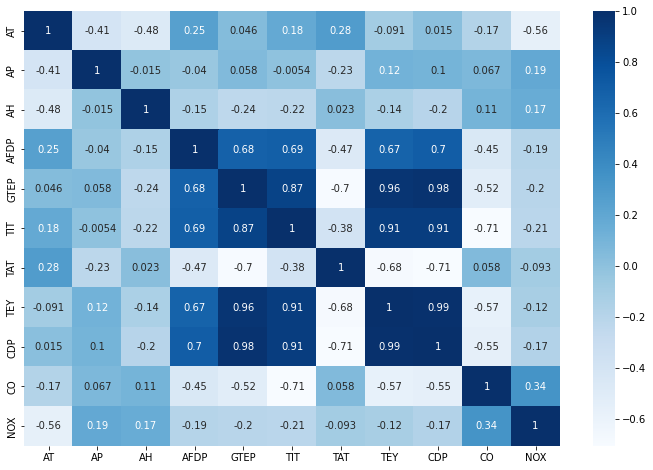

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

#### Correlation with Turbine energy yield

In [15]:
df_2 = df.copy()
correlation = df_2.corr()['TEY']
correlation

AT     -0.091223
AP      0.118236
AH     -0.137371
AFDP    0.665474
GTEP    0.964129
TIT     0.910291
TAT    -0.682420
TEY     1.000000
CDP     0.988780
CO     -0.569825
NOX    -0.116150
Name: TEY, dtype: float64

In [16]:
correlation = correlation[correlation!=1]
correlation

AT     -0.091223
AP      0.118236
AH     -0.137371
AFDP    0.665474
GTEP    0.964129
TIT     0.910291
TAT    -0.682420
CDP     0.988780
CO     -0.569825
NOX    -0.116150
Name: TEY, dtype: float64

- Positive correlation describes the relationship between two variables that change together
- Negative correlation describes the relationship between two variables which change in opposing directions (Inverse)

In [17]:
positive_correlations = correlation[correlation>0].sort_values(ascending=False)
negative_correlations = correlation[correlation<0].sort_values(ascending=False)
print("Positive Corr:\n",positive_correlations,
      "\n\nNegative Corr:\n",negative_correlations)

Positive Corr:
 CDP     0.988780
GTEP    0.964129
TIT     0.910291
AFDP    0.665474
AP      0.118236
Name: TEY, dtype: float64 

Negative Corr:
 AT    -0.091223
NOX   -0.116150
AH    -0.137371
CO    -0.569825
TAT   -0.682420
Name: TEY, dtype: float64


Text(0.5, 1.0, 'Correlation with Turbine energy yield(TEY) \n')

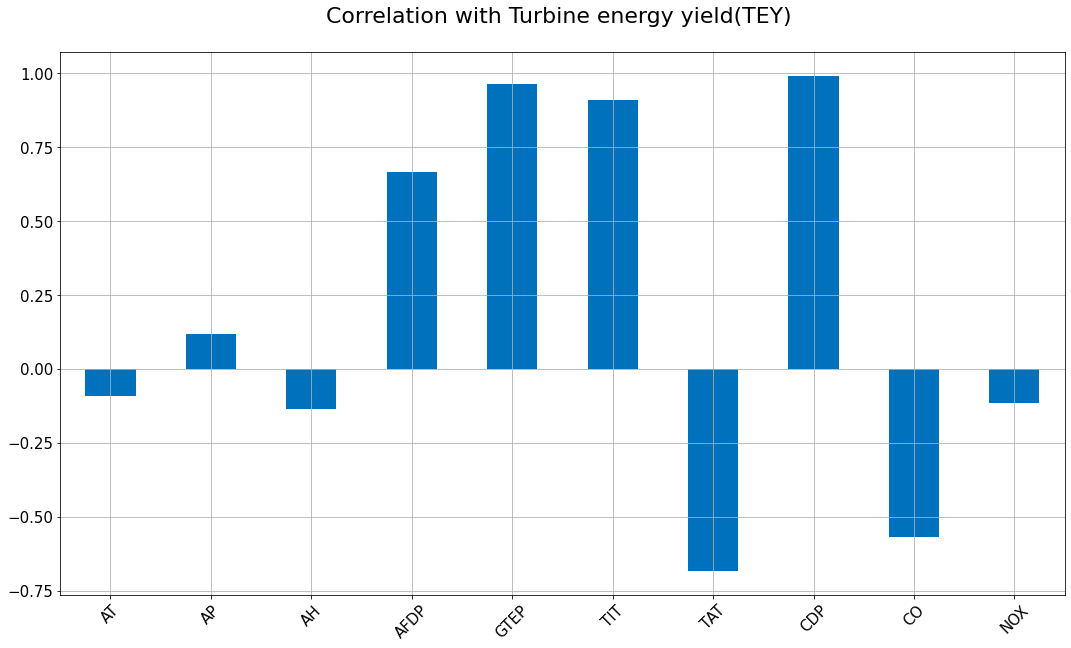

In [20]:
correlation.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#0072BD',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield(TEY) \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

#### Ouliers Detection
Interquartile Range (IQR): 
An interquartile range is a measure of where the bulk of the values lie

In [22]:
def min_max_iqr(df,col):
    q1, q3 = df[col].quantile([0.25,0.75])
    IQR = q3-q1
    min_valid = q1 - 1.5*IQR
    max_valid = q3 + 1.5 * IQR
    return min_valid,max_valid

In [23]:
for col in df.columns:
    min_valid,max_valid = min_max_iqr(df,col)
    # print(col,min_valid,max_valid)
    outlier_rows =df[(df[col] < min_valid) | (df[col] > max_valid)]
    print("Column: ",col,
          "\nCount of outlier rows:: ", outlier_rows.shape[0] , 
          "\n% of outlier", outlier_rows.shape[0]/df.shape[0])

Column:  AT 
Count of outlier rows::  1 
% of outlier 2.723014922121773e-05
Column:  AP 
Count of outlier rows::  612 
% of outlier 0.01666485132338525
Column:  AH 
Count of outlier rows::  130 
% of outlier 0.0035399193987583053
Column:  AFDP 
Count of outlier rows::  557 
% of outlier 0.015167193116218277
Column:  GTEP 
Count of outlier rows::  7 
% of outlier 0.00019061104454852414
Column:  TIT 
Count of outlier rows::  315 
% of outlier 0.008577497004683585
Column:  TAT 
Count of outlier rows::  4955 
% of outlier 0.13492538939113385
Column:  TEY 
Count of outlier rows::  33 
% of outlier 0.0008985949243001852
Column:  CDP 
Count of outlier rows::  10 
% of outlier 0.00027230149221217734
Column:  CO 
Count of outlier rows::  2654 
% of outlier 0.07226881603311186
Column:  NOX 
Count of outlier rows::  936 
% of outlier 0.0254874196710598


#### Visualization of distribution of data and outliers

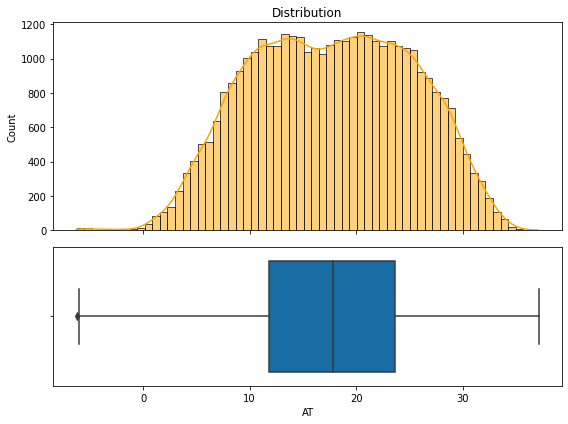

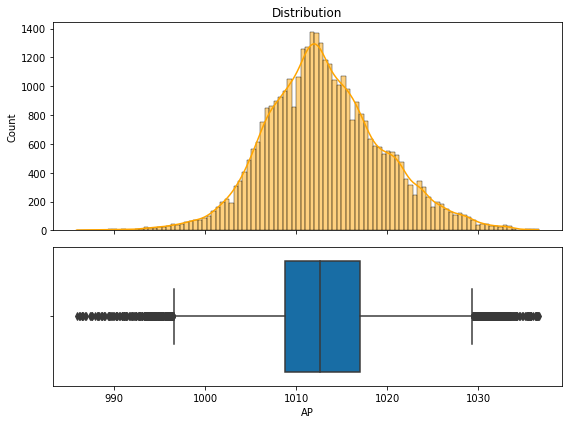

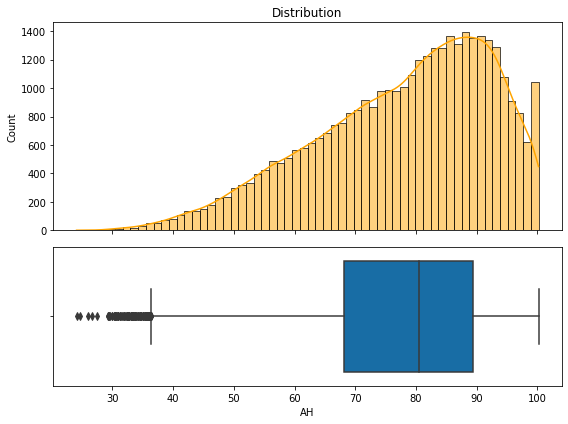

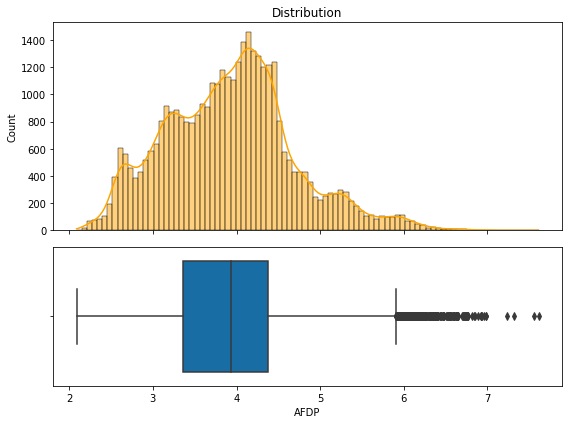

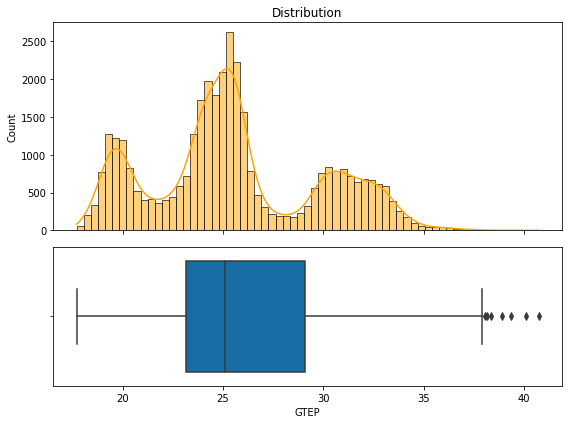

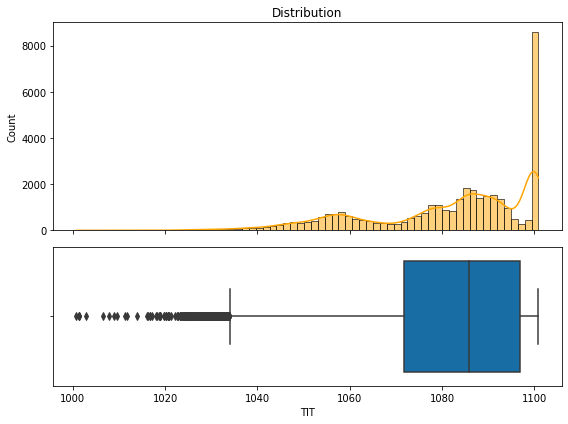

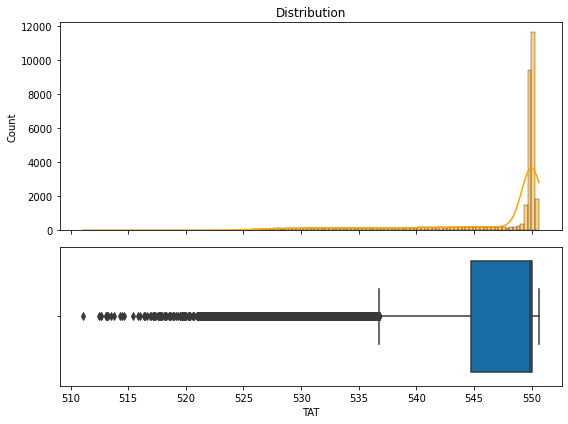

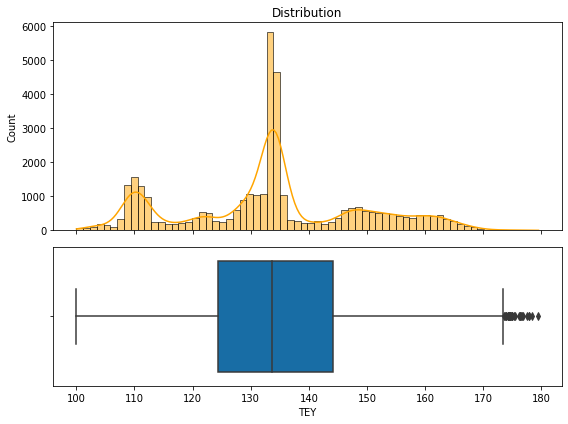

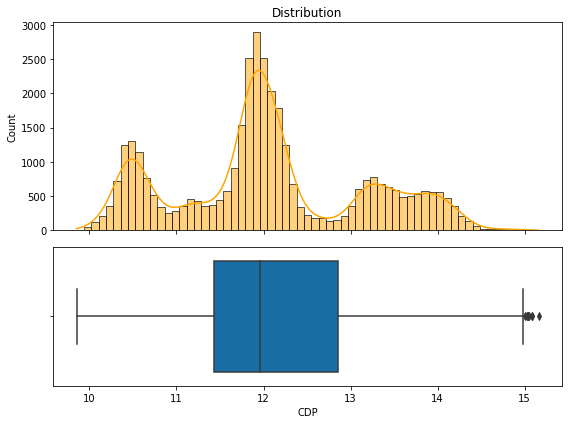

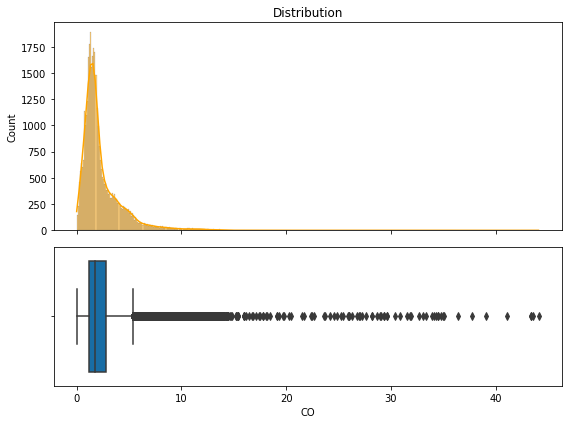

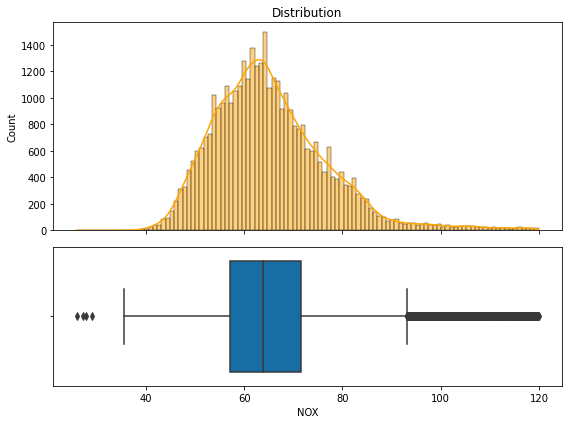

In [26]:
for col in df.columns:
  fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
  skew = df[col].skew()
  kurt = df[col].kurt()
  sns.histplot(x=col, data=df, ax=axs[0], color='orange',kde=True)
  sns.boxplot(x=col, data=df, ax=axs[1], color='#0072BD')
  axs[0].set_title("Distribution")
  axs[1].set_xlabel(col)
  plt.tight_layout()
  plt.show()

- Out of all the features some of them are normally distributed. The distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers.

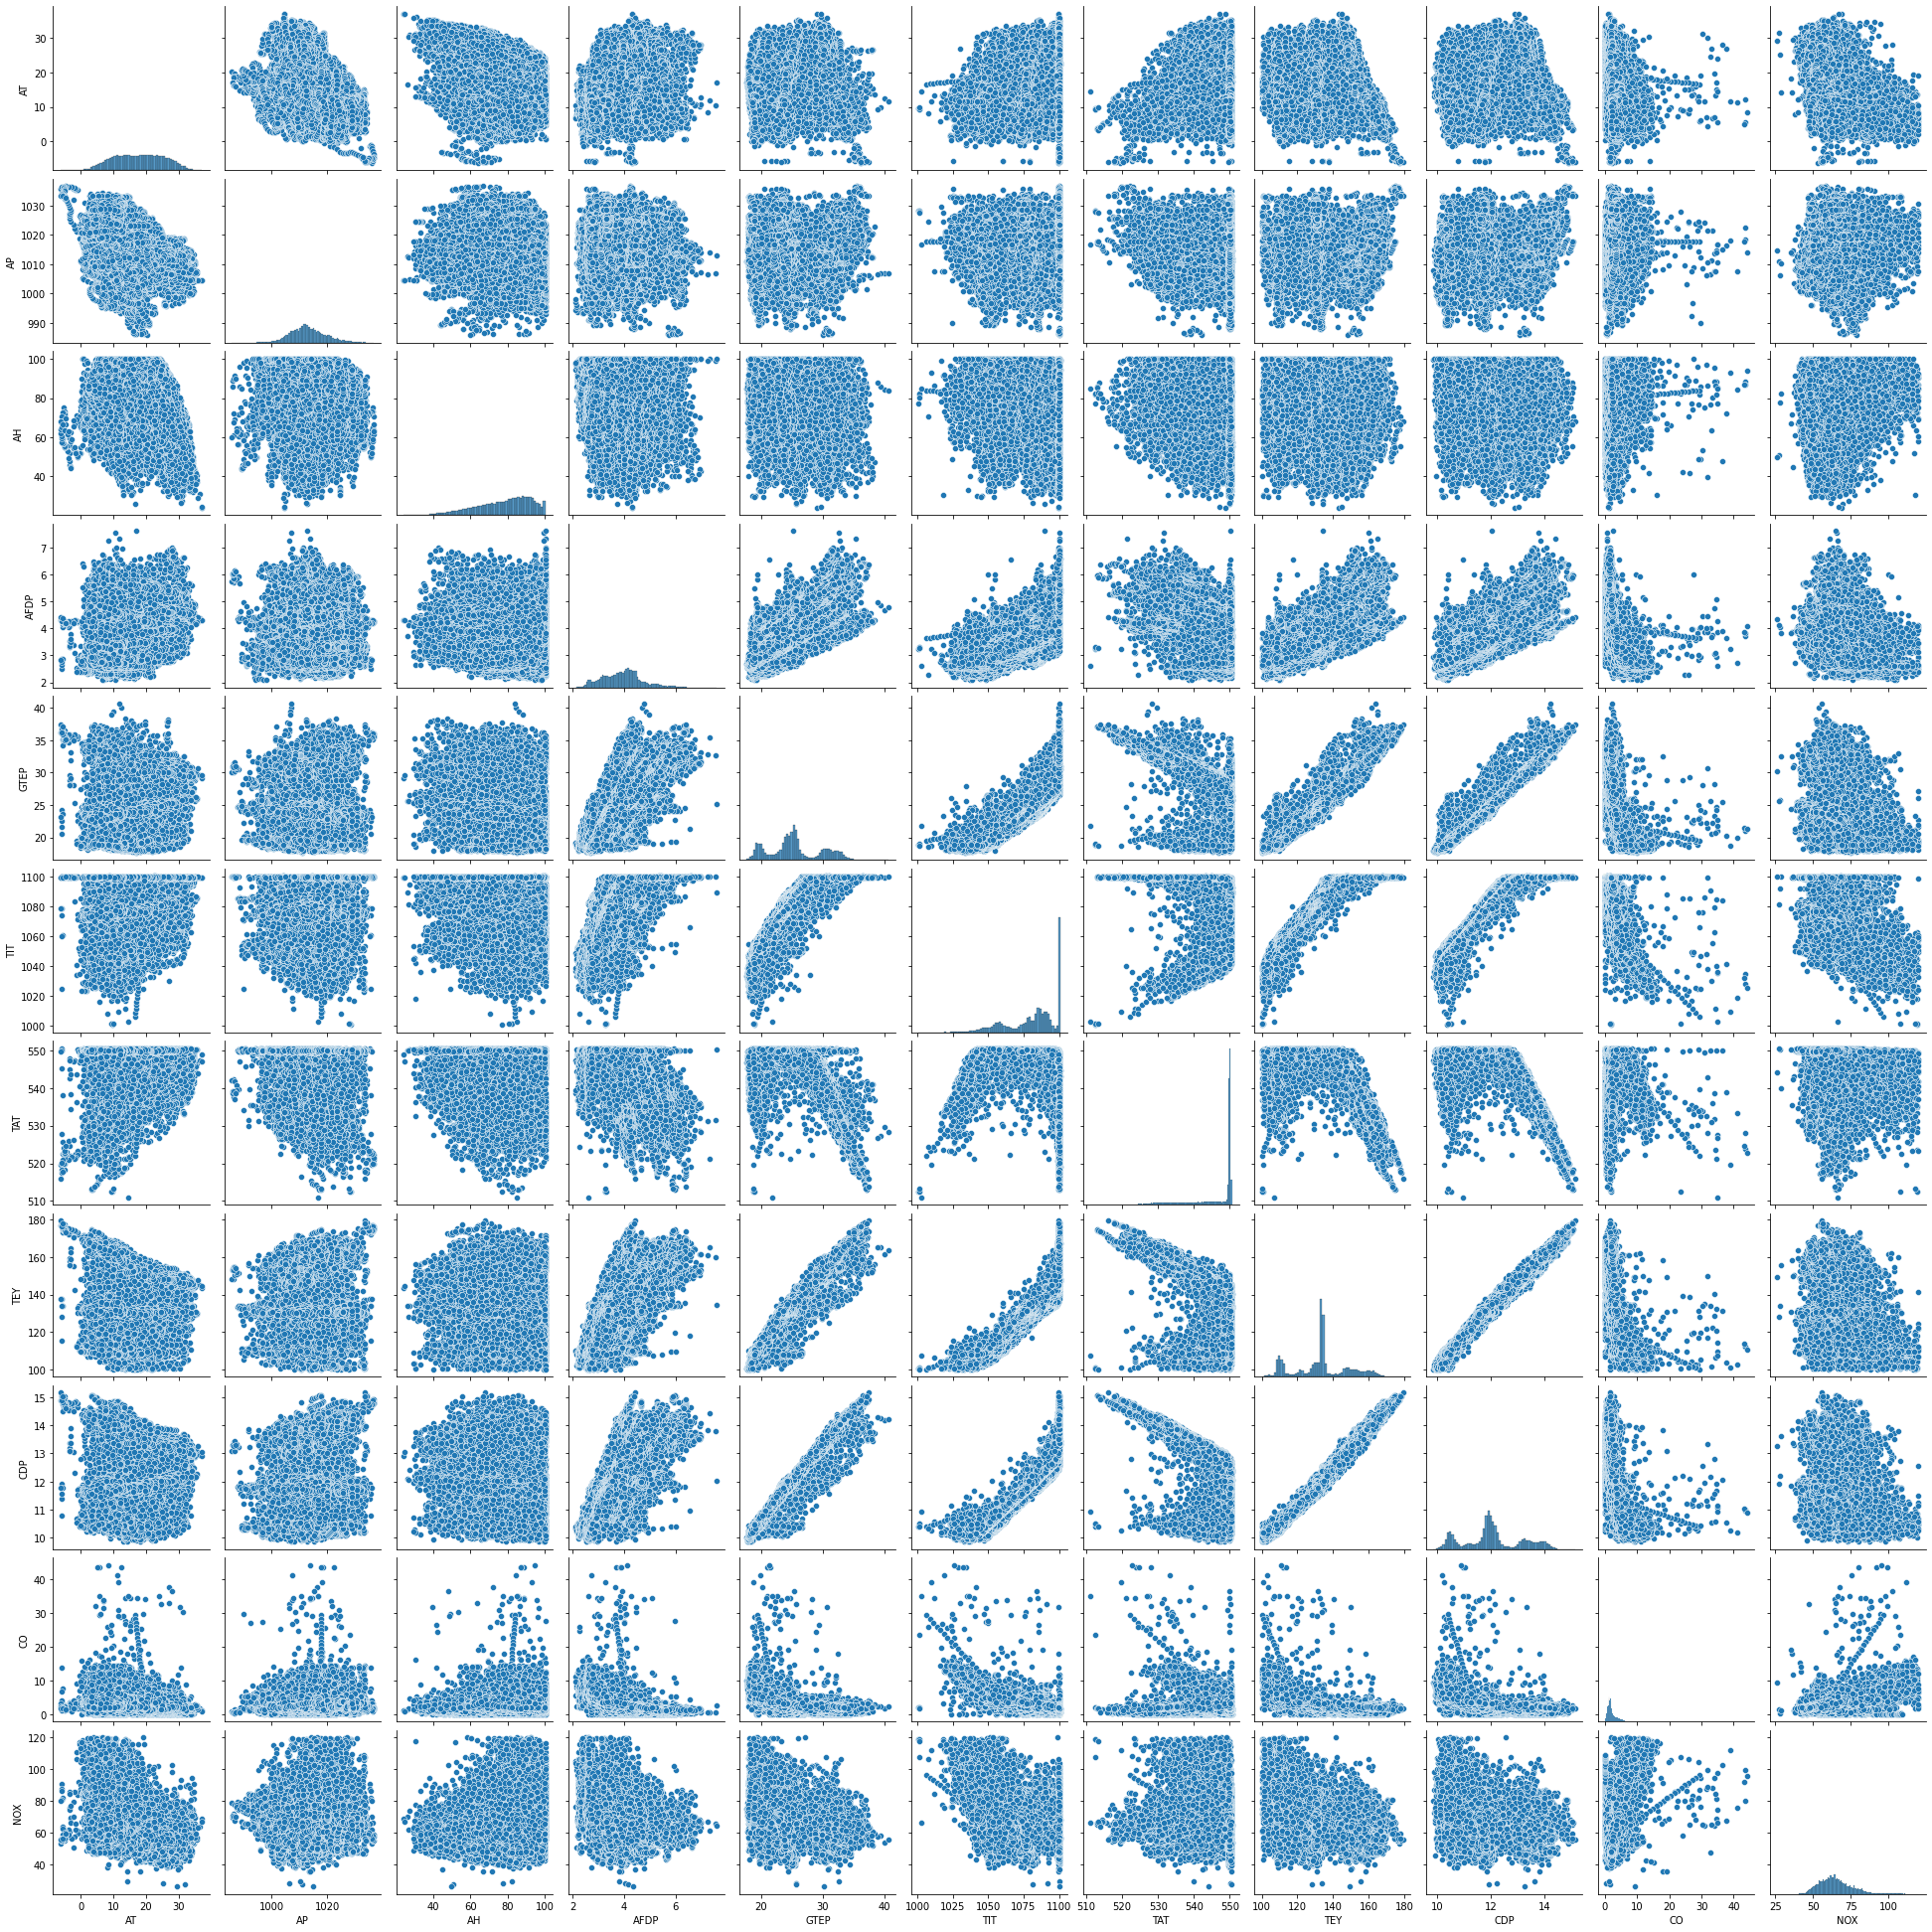

In [25]:
sns.pairplot(df)

## X & Y Train test

In [27]:
X = df.drop(['TEY'],axis=1)
Y = df.drop(['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)

In [28]:
X.shape, Y.shape

((36724, 10), (36724, 1))

## Feature Selection Technique
- Important Features

In [29]:
model = ExtraTreesRegressor()
model.fit(X, Y)
print(model.feature_importances_)

[0.01699268 0.00047009 0.00047575 0.00726939 0.25168173 0.24857946
 0.06731023 0.40217672 0.00323124 0.00181271]


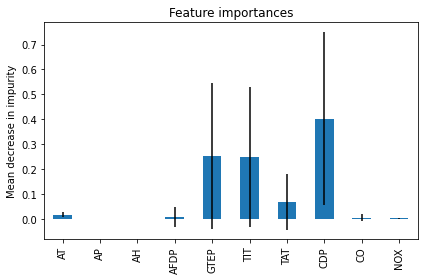

In [31]:
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Ploting graph of feature importances for better visualization

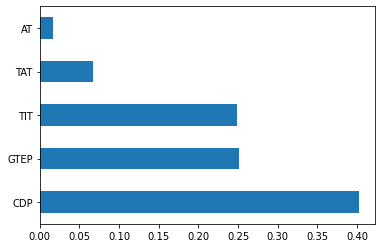

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
X_feature = X[['CDP','TIT','GTEP','AT','AFDP']]
X_feature.head(2)

CDP     TIT    GTEP      AT    AFDP
0  11.898  1086.2  23.979  4.5878  3.5758
1  11.892  1086.1  23.951  4.2932  3.5709

### Train Test Split

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X_feature,Y, test_size=0.3, random_state=7)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((25706, 5), (11018, 5), (25706, 1), (11018, 1))

#### Function for error evaluation

In [40]:
def eval_fun(Y_test,Y_pred):
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    rmse = math.sqrt(mse)
    return r2, mse, mae, rmse

#### Linear regression

In [37]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [42]:
Y_pred_lr = lr.predict(X_test)

In [43]:
r2, rmse, mse, mae = eval_fun(Y_test,Y_pred_lr) 
print("R2 score=", r2,
      "\nRoot Mean Square Error (RMSE)=", rmse,
      "\nMean Square Error (MSE)=", mse, 
      "\nMean Absolute Error (MAE)=", mae)

R2 score= 0.9956390510236723 
Root Mean Square Error (RMSE)= 1.0766704471388577 
Mean Square Error (MSE)= 0.81261381327235 
Mean Absolute Error (MAE)= 1.0376273161105858


Text(0.5, 0, 'Y Test')

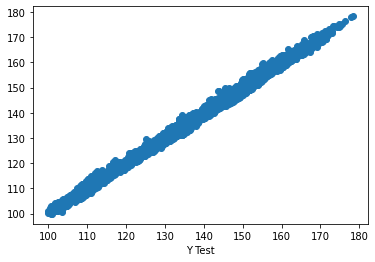

In [44]:
plt.scatter(Y_test,Y_pred_lr)
plt.xlabel('Y Test')

#### Decision Tree Regressor

In [45]:
dtr = DecisionTreeRegressor(random_state = 7) 
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=7)

In [46]:
Y_pred_dtr = dtr.predict(X_test)

In [47]:
r2, rmse, mse, mae = eval_fun(Y_test,Y_pred_dtr) 
print("R2 score=", r2,
      "\nRoot Mean Square Error (RMSE)=", rmse,
      "\nMean Square Error (MSE)=", mse, 
      "\nMean Absolute Error (MAE)=", mae)

R2 score= 0.9962666528792777 
Root Mean Square Error (RMSE)= 0.9217224360137954 
Mean Square Error (MSE)= 0.6685859502632058 
Mean Absolute Error (MAE)= 0.9600637666393808


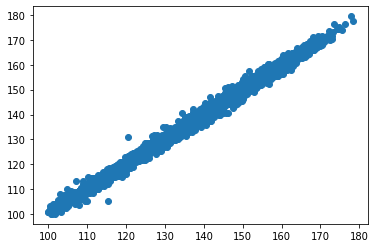

In [48]:
plt.scatter(Y_test,Y_pred_dtr)

#### Random Forest Grid search

In [49]:
rf = RandomForestRegressor(oob_score=True)
random_grid = {'n_estimators' : [100, 500, 1200],
'max_depth' :[ 3,5,7,10,25,30],
'max_features' : ['sqrt', 'log2'],
'min_samples_split': [2, 5, 10, 15, 100],
'min_samples_leaf':[1, 2, 5, 10, 11]}

In [50]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=11, min_samples_split=15, n_estimators=500; total time=   6.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=11, min_samples_split=15, n_estimators=500; total time=   9.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=11, min_samples_split=15, n_estimators=500; total time=   6.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=11, min_samples_split=15, n_estimators=500; total time=   9.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=11, min_samples_split=15, n_estimators=500; total time=  10.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.3min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.1min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
                   n_jobs=1,
                   param_distributions={'max_depth': [3, 5, 7, 10, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 11],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 500, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [53]:
best_random = rf_random.best_estimator_

In [54]:
Y_pred_rf = best_random.predict(X_test)

In [55]:
r2, rmse, mse, mae = eval_fun(Y_test,Y_pred_rf) 
print("R2 score=", r2,
      "\nRoot Mean Square Error (RMSE)=", rmse,
      "\nMean Square Error (MSE)=", mse, 
      "\nMean Absolute Error (MAE)=", mae)

R2 score= 0.9982979416650715 
Root Mean Square Error (RMSE)= 0.4202195252619397 
Mean Square Error (MSE)= 0.4591657989556157 
Mean Absolute Error (MAE)= 0.6482434151319546


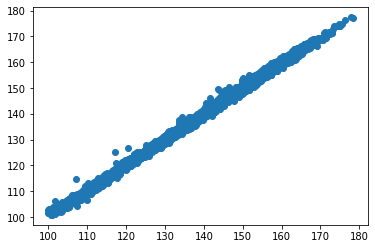

In [56]:
plt.scatter(Y_test,Y_pred_rf)

#### XGBoost (from SKlearn) Grid Search

In [57]:
xgbr = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, random_state=7)
xgbr.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=1.0, random_state=7)

In [58]:
Y_pred = xgbr.predict(X_test)

#### Hyperparameters for GradientBoostingRegressor

In [59]:
param_grid = {'n_estimators': [200, 500,1000],
          'max_depth': [3, 5, 6,7,8],
          'subsample': [0.7,0.8],
          'learning_rate': (0.01, 0.05, 0.1),
          'max_features' : ['sqrt', 'log2']}

In [60]:
gscv =GridSearchCV(estimator = GradientBoostingRegressor(),
                   param_grid = param_grid,
                   cv=2, 
                   verbose=2)

In [61]:
gscv.fit(X_train,Y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=200, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=500, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=500, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=500, subsample=0.8; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=500, subsample=0.8; total time=   4.6s
[CV] END learning_rate=0.01, max_

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': (0.01, 0.05, 0.1),
                         'max_depth': [3, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [0.7, 0.8]},
             verbose=2)

In [62]:
gscv.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 1000,
 'subsample': 0.7}

In [63]:
gscv.cv_results_['mean_test_score'].max()

0.9982175755893237

In [64]:
gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth= 8, max_features= 'sqrt', n_estimators= 1000, subsample= 0.7,random_state=7)
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_features='sqrt',
                          n_estimators=1000, random_state=7, subsample=0.7)

In [65]:
Y_pred_gbr = gbr.predict(X_test)

In [66]:
r2, rmse, mse, mae = eval_fun(Y_test,Y_pred_gbr) 
print("R2 score=", r2,
      "\nRoot Mean Square Error (RMSE)=", rmse,
      "\nMean Square Error (MSE)=", mse, 
      "\nMean Absolute Error (MAE)=", mae)

R2 score= 0.9984845116790455 
Root Mean Square Error (RMSE)= 0.3741574361481716 
Mean Square Error (MSE)= 0.4409308784131029 
Mean Absolute Error (MAE)= 0.6116840983286811


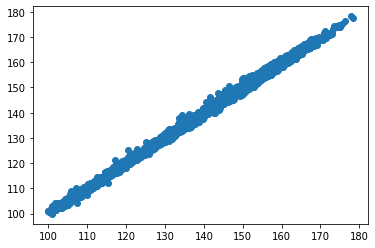

In [67]:
plt.scatter(Y_test,Y_pred_gbr )

### Predicting values from Model using same dataset

In [68]:
# generating predictions for test data
Y_predict_test = gbr.predict(X_test) 

# creating table with test values & predicted values for test
predictions_df = pd.DataFrame(X_test)
predictions_df['Actual'] = Y_test
predictions_df['Predicted'] = Y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

(11018, 7)


CDP     TIT    GTEP       AT    AFDP  Actual   Predicted
30175  11.550  1071.5  23.699   1.0584  2.8852  129.98  130.908184
26404  11.855  1079.3  25.369  29.1490  4.1996  127.89  127.596650
11679  12.931  1100.0  29.034  29.4350  4.6768  143.80  144.709815
21622  13.775  1100.0  32.226  14.8750  4.1457  155.10  155.873506
15549  11.953  1085.6  24.303  14.8530  3.2255  133.15  133.196009
34083  10.418  1050.0  19.493  18.9210  2.9901  110.06  109.627708
26999  11.268  1066.3  22.641  20.6970  3.7893  120.58  120.780417
31496  12.100  1083.5  32.108  20.3130  3.4658  134.20  134.000726
28201  11.941  1079.1  24.523  16.1970  4.4274  130.97  131.346552
17453  11.868  1084.3  23.777  12.5160  3.2343  132.55  132.834143

In [69]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

CDP     TIT    GTEP       AT    AFDP  Actual   Predicted     Error
0      11.550  1071.5  23.699   1.0584  2.8852  129.98  130.908184 -0.007141
1      11.855  1079.3  25.369  29.1490  4.1996  127.89  127.596650  0.002294
2      12.931  1100.0  29.034  29.4350  4.6768  143.80  144.709815 -0.006327
3      13.775  1100.0  32.226  14.8750  4.1457  155.10  155.873506 -0.004987
4      11.953  1085.6  24.303  14.8530  3.2255  133.15  133.196009 -0.000346
...       ...     ...     ...      ...     ...     ...         ...       ...
11013  11.872  1084.6  23.882  13.2660  3.1001  132.41  132.688537 -0.002104
11014  11.987  1087.5  24.761  13.8900  3.3609  134.80  134.529450  0.002007
11015  11.568  1077.7  23.264  26.3030  4.2586  123.21  123.122202  0.000713
11016  10.493  1048.8  19.921  20.7680  3.0863  109.06  109.598551 -0.004938
11017  12.025  1082.0  25.710  28.9430  4.1535  129.18  129.313291 -0.001032

[11018 rows x 8 columns]

### Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

In [70]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(Y_test,Y_predict_test))
print ("MSE:",metrics.mean_squared_error(Y_test,Y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict_test)))

MAE: 0.4409308784131029
MSE: 0.3741574361481716
RMSE: 0.6116840983286811


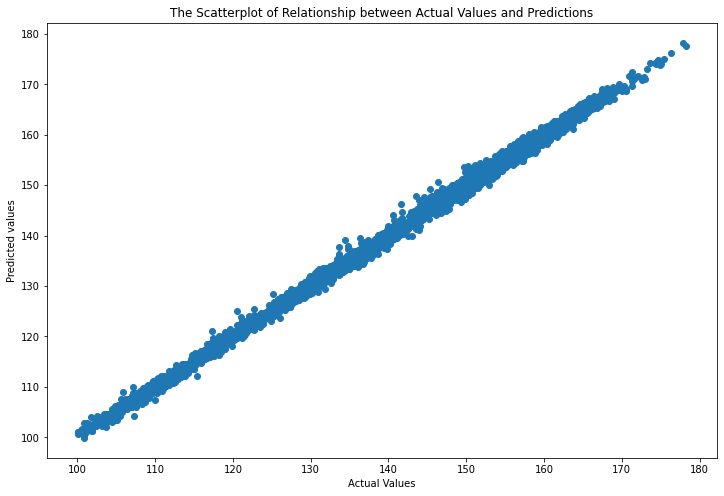

In [71]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [72]:
#Evaluation of the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(Y_test,Y_predict_test)*100,2)))

This shows our model predict % 99.85 of the target correctly


In [73]:
import pickle
filename = 'Regression_model.pk1'
pickle.dump(gbr, open(filename,'wb'))

In [74]:
# loading the saved model
loaded_model = pickle.load(open('Regression_model.pk1', 'rb'))

In [75]:
input_data = (4.5878,3.5758,23.979,1086.2,11.898)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

In [76]:
print(prediction)

[102.68396555]


Actual value 134.67